<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter6/Chapter6_6_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. KNN 분류
인도의 간질환자를 두 집단으로 나누는 작업을 실행해보자

In [54]:
import pandas as pd

liver = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/indian_liver_patient.csv")
liver

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [55]:
# Dataset 변수를 통해 간질환자는 두 집단으로 나뉘어 있다는 것을 알 수 있다.
print(liver.Dataset.unique())

[1 2]


간질환자 데이터세트는 Dataset 변수가 1인 행을 간암환자로, 2인 행을 비환자로 구분한다. 이진 분류 모델은 True(1)와 False(0)로 종속변수를 설정해야 하므로 Dataset변수를 반환할 필요가 있다.  
간암환자인지 예측하는 분석 모델을 만들기 위해, Dataset 변수가 2이면 0으로 바꾼다.

결과적으로 분류모델은 간암환자를 True(1), 비환자를 False(0)으로 학습하게 된다.  


또한, 성별 변수는 one-hot incoding 하여 사용하자

In [56]:
print(liver.info())
# print(liver.Gender)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

gencoder = OneHotEncoder().fit(liver.Gender.values.reshape(-1,1))
sparse_mat = gencoder.transform(liver.Gender.values.reshape(-1,1))
print(sparse_mat.toarray())

liver.Gender = sparse_mat.toarray()[:,1].astype(int)
print(liver.Dataset)
liver.Dataset = liver.Dataset.map({1: 1, 2 : 0})
print(liver.Dataset)
liver

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 583, dtype: int64


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [58]:
liver.isna().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [59]:
liver.dropna(axis = 0, inplace = True)
liver.isna().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


In [62]:
from sklearn.model_selection import train_test_split

X = liver.drop(columns = ['Dataset'])
y = liver.Dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify = y, random_state = 1)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 15, weights = 'uniform')
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

정확도 	63.79%
정밀도 	72.93%


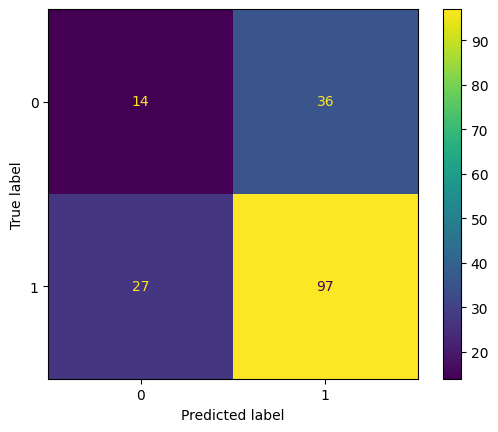

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay, \
                            accuracy_score, precision_score, recall_score, f1_score

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

pred = clf.predict(X_test)

acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred)

print("정확도 \t{}%".format(round(acc*100,2)))
print("정밀도 \t{}%".format(round(prec*100,2)))

# 2. scikit-learn의 KNeighborsRegressor
넘파이를 사용해 임의로 생성한 데이터를 다뤄보자

In [80]:
import numpy as np

np.random.seed(0)

X = np.sort(5 * np.random.rand(400,1), axis = 0)
T = np.linspace(0, 5, 500)[:, np.newaxis] # shape : (500,1)
y = np.sin(X).ravel()

In [81]:
y[::1] += 1 * (0.5 - np.random.rand(400))

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [83]:
from sklearn.neighbors import KNeighborsRegressor

knn_uni = KNeighborsRegressor(n_neighbors=20, weights = 'uniform')
knn_dis = KNeighborsRegressor(n_neighbors=20, weights = 'distance')

knn_uni.fit(X_train, y_train)
knn_dis.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [86]:
uni_pred = knn_uni.predict(X_test)
dis_pred = knn_dis.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

preds = [uni_pred, dis_pred]
weights = ['uniform', 'distance']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index = weights, columns = evls)

for pred, nm in zip(preds, weights):
  mse = mean_squared_error(y_test, pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, pred)
  results.loc[nm, 'mse'] = round(mse, 2)
  results.loc[nm, 'rmse'] = round(rmse,2)
  results.loc[nm, 'mae'] = round(mae, 2)
results

,mse,rmse,mae
uniform,0.1,0.31,0.27
distance,0.11,0.34,0.28


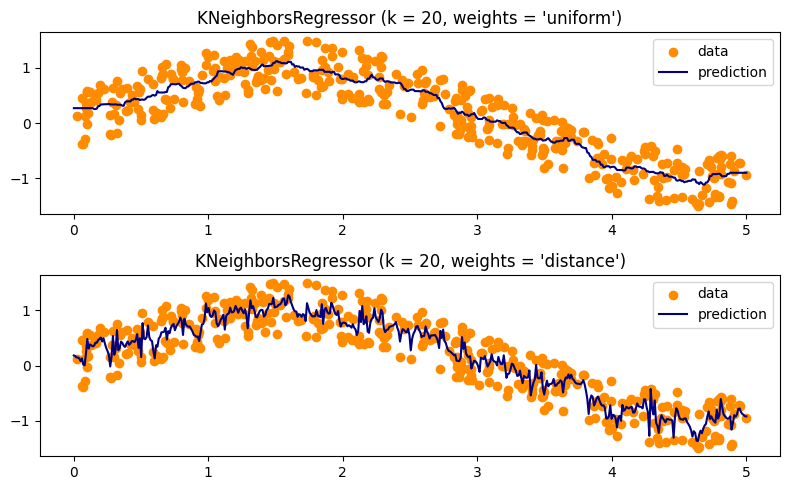

In [87]:
# 시각화를 수행해보자
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))

for i, weights in enumerate(['uniform', 'distance']):
  knn = KNeighborsRegressor(n_neighbors = 20, weights = weights)
  y_ = knn.fit(X,y).predict(T)

  plt.subplot(2,1,i+1)
  plt.scatter(X, y, color ='darkorange', label = 'data')
  plt.plot(T, y_, color = 'navy', label = 'prediction')
  plt.axis('tight')
  plt.legend()
  plt.title("KNeighborsRegressor (k = %i, weights = '%s')"%(20, weights))

plt.tight_layout()
plt.show()